**Main Objective of the NoteBook**
- To read, clean, preprocess, explore the raw data, and engineer features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from IPython.display import Markdown, display
import seaborn as sns

In [3]:
def fill_na(df):
    '''This function performs mean imputation of missing values on a dataframe
    Arguements:
    df :  A pandas dataframe
    '''
    imputer = SimpleImputer(strategy = 'mean')
    x_ = imputer.fit_transform(df)
    df.iloc[:,:] = x_
    return df

In [4]:

def check_corr(x, y):
    '''This function calculates the correlation coefficient and the corresponding p-value between two selected variables
    Arguements:
    x : single column pandas dataframe
    y : single column pandas dataframe
    '''
# Hypothesis test for correlation
    x, y = x.align(y, join = 'inner', axis = 0)
    z = pd.concat([x, y], axis =1)
    x_ = z.iloc[:, 0]
    y_ = z.iloc[:, 1]
    corr, p_value = pearsonr(x_, y_)
    return corr, p_value


In [5]:
def scatter_plot(x, y):
    '''This function plots a scatter graph between two selected variables
    Arguements:
     x : single column pandas dataframe
     y : single column pandas dataframe
    '''
    x, y = x.align(y, join = 'inner', axis = 0)
    x_name = list(x.columns)[0]
    y_name = list(y.columns)[0]
    plt.scatter(x, y)
    plt.title(f'Relationship between {x_name} & {y_name}')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

In [6]:
def load_targets(path: str) -> pd.core.frame.DataFrame:
    '''1) This function takes in the path to a csv
    2) It loads the file into pandas dataframe
    3) then it cleans the dataframe
    4) finally it returns the dataframe
    Arguements:
    path: path to a csv file.
    '''
    df_target = pd.read_csv(path)
    mask = df_target['Average'].map(lambda x: x.isdigit())
    df2_target = df_target.loc[mask]
    df2_target.loc[:,'Average'] = df2_target['Average'].astype('float')
    df2_target = df2_target.groupby(['Jurisdiction']).mean()
    df2_target = df2_target.astype('float')

    chinese = ['B-S-J-Z (China)', 'Hong Kong (China)', 'Macao (China)', 'B-S-J-G (China)', 'Chinese Taipei']
    remove_nations = ['Albania (2015)', 'Argentina (2015)', 'International Average (OECD)', 'Kazakhstan (2015)','Malaysia (2015)', 'Palestinian Authority', 'Selected countries and jurisdictions', 'Ukraine (18 of 27 Regions)']
    
    df2_target = df2_target.drop(index = remove_nations)
    df2_target.loc['China'] = df2_target.loc[chinese].mean()
    df2_target = df2_target.rename(index = {'Baku (Azerbaijan)': 'Azerbaijan'})
    df2_target = df2_target.drop(index = chinese)
    
    name = path.split()[-1].split('.')[0]
    df2_target = df2_target.rename(columns = {'Average':name})
    df2_target = df2_target.rename(index = {'Türkiye':'Turkey'})
    df2_target.index.name = 'Country'
    df2_target = df2_target.sort_index()
    return df2_target

# Set file paths to the variables underneath
reading_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\PISA Reading.csv"
math_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\PISA Maths.csv"
science_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\PISA Science.csv"


reading_score = load_targets(reading_path)
math_score = load_targets(math_path)
science_score = load_targets(science_path)

pisa_score = pd.concat([reading_score, math_score, science_score], axis = 1)

print('\n')
print('PISA Scores :')
print(pisa_score.sample(n = 5))

#list of 86 countries in the study
nations_to_keep = list(pisa_score.index)



PISA Scores :
               Reading       Maths     Science
Country                                       
Croatia     479.833333  464.833333  483.333333
Montenegro  412.500000  411.000000  408.666667
Latvia      480.375000  486.142857  492.833333
Kosovo      347.333333  361.000000  366.666667
Indonesia   383.875000  375.428571  390.000000


In [7]:
def load_teacher_salary(path: str) -> pd.core.frame.DataFrame:
    '''1) This function takes in the path to a csv
    2) It loads the file into pandas dataframe
    3) then it cleans the dataframe
    4) finally it returns the dataframe
    Arguements:
    path: path to a csv file.
    '''
    salary = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Education Infra\Teacher Salary csv.csv")
    salary = salary.iloc[2:].rename(columns = {'Experience level':'Country'}).set_index('Country')
    salary.iloc[:,0] = salary.iloc[:,0].str.replace(',','')
    salary.iloc[:,1] = salary.iloc[:,1].str.replace(',','')
    salary.iloc[:,2] = salary.iloc[:,2].str.replace(',','')
    salary.iloc[:,3] = salary.iloc[:,3].str.replace(',','')
    salary = salary.apply(lambda x: x.replace('..', np.nan))
    salary = salary.apply(lambda x: x.astype('float'))
    salary = salary.mean(axis = 1).to_frame().rename(columns = {0:'Teacher Salary'})
    salary_dict = {'Albania':42587, 'Algeria':15540, 'Argentina':6008.467, 'Australia':74833.4, 'Austria':70638.87, 'Azerbaijan':4886, 'Belarus':11070, 'Bosnia and Herzegovina':12091, 'Brazil':24695.72, 'Brunei Darussalam':11839,
    'Bulgaria':16598, 'Cambodia':18879, 'Croatia':17171, 'Cyprus':24797, 'Czech Republic':38290.62, 'Dominican Republic':3051, 'El Salvador':15600, 'Georgia':63200, 'Guatemala':11856, 'Iceland':44985.63,
     'Indonesia':19486, 'Jamaica':13369, 'Jordan':8480, 'Kazakhstan':1136, 'Kosovo':22803, 'Lebanon':11908, 'Malaysia':11273, 'Malta':34181, 'Moldova':6446,
     'Mongolia':406, 'Montenegro':25636, 'Morocco':15866, 'North Macedonia':7020, 'Panama':14400, 'Paraguay':4980, 'Peru':7776, 'Philippines':3907, 
     'Qatar':27306, 'Romania':31948.97, 'Russia':19561.08, 'Saudi Arabia':38297, 'Serbia':6372, 'Singapore':81133, 'Thailand':16686, 'Trinidad and Tobago':23257, 'Tunisia':11174, 'Ukraine':10223,
     'United Arab Emirates':17612, 'Uruguay':12000, 'Uzbekistan':2719, 'Viet Nam':15267, 'China':41181}
    for country, salary_val in salary_dict.items():
        salary.loc[country] = salary_val
    salary = salary.sort_index()
    to_keep = list(salary.index.unique()[:-1])
    salary = salary.loc[to_keep]
    to_drop = ['Czechia', 'European Union 25 members in OECD and accession countries', 'Non-OECD Economies', 'Legend:','OECD Average', 'm:', 'z:']
    salary = salary.drop(index = to_drop)
    salary = salary.drop(index = 'Data extracted on 21 Jun 2024 12:05 UTC (GMT) from OECD.Stat')
    salary = salary.rename(index = {'Türkiye':'Turkey'})
    salary.index.name = 'Country'
    return salary

# Set file path of teacher salary csv to the variable underneath
teacher_salary_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\Teacher Salary csv.csv"


teacher_salary = load_teacher_salary(teacher_salary_path)


print(teacher_salary.sample(n = 5))
print()

                 Teacher Salary
Country                        
France                  43174.0
Portugal                48575.5
Slovak Republic         19164.5
Canada                  64361.0
Netherlands             74361.0



In [8]:
def load_pupil_ratio(path: str) -> pd.core.frame.DataFrame:
    '''1) This function takes in the path to a csv
    2) It loads the file into pandas dataframe
    3) then it cleans the dataframe
    4) finally it returns the dataframe
    Arguements:
    path: path to a csv file.
    '''
    df = pd.read_csv(path).set_index('Country Name')
    df = df.mean(axis = 1)
    name = path.split('\\')[-1].split('.')[0]
    df = df.to_frame(name = name)
    nations_to_drop = ['Africa Eastern and Southern', 'Africa Western and Central','Arab World', 'Central Europe and the Baltics','Channel Islands','Caribbean small states', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Euro area', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'Marshall Islands', 'Middle East & North Africa (excluding high income)', 'North America', 'OECD members',
               'Other small states', 'Pre-demographic dividend', 'Sub-Saharan Africa', 'Upper middle income', 'East Asia & Pacific (IDA & IBRD countries)', 'World', 'Europe & Central Asia (IDA & IBRD countries)', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Timor-Leste', 'Middle East & North Africa (IDA & IBRD countries)', 'Small states', 'West Bank and Gaza', 'Pacific island small states', 'Post-demographic dividend', 'French Polynesia', 'South Asia', 'Sub-Saharan Africa (excluding high income)', 'Middle income', 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
                'Isle of Man', 'Not classified', 'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean', 'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income', 'Micronesia, Fed. Sts.', 'High income', 'Late-demographic dividend', 'Middle East & North Africa',]
    df = df.drop(index = nations_to_drop)
    df = df.rename(index = {"Korea, Rep." : 'Korea', 'Turkiye': 'Turkey', 'Russian Federation': 'Russia', 'Czechia': 'Czech Republic'})
    
    df = df.loc[nations_to_keep]
    df.loc['Kosovo'] = 26.85
    df.loc['Montenegro'] = 26.85
    df = df.sort_index()
    df.index.name = 'Country'
    return df

# Set file path of pupil per teacher ratio csv to the variable underneath
pupil_teacher_ratio_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\Pupil Per Teacher Ratio.csv"


pupil_to_teacher_ratio = load_pupil_ratio(pupil_teacher_ratio_path)



print(pupil_to_teacher_ratio.sample(n = 5))
print()

                 Pupil Per Teacher Ratio
Country                                 
Philippines                    32.139100
New Zealand                    17.468345
Austria                        13.279714
Slovak Republic                17.432623
Israel                         12.835019



In [9]:
def load_avg_class_size(path: str) -> pd.core.frame.DataFrame:
    '''1) This function takes in the path to a csv
    2) It loads the file into pandas dataframe
    3) then it cleans the dataframe
    4) finally it returns the dataframe
    Arguements:
    path: path to a csv file.
    '''
    df = pd.read_csv(path)
    cols = ['Country', 'Value']
    df2 = df[cols].groupby('Country').mean()[['Value']]
    name = path.split('\\')[-1].split('.')[0]
    
    df2 = df2.rename(columns = {'Value': name})
    df2 = df2.loc[['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
                    'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden','Switzerland', 'Türkiye', 'United Kingdom', 'United States']]
    df2 = df2.rename(index = {'Czechia':'Czech Republic'})
    df2 = df2.rename(index = {'Türkiye':'Turkey'})
    df2.index.name = 'Country'
    df2 = df2.sort_index()
    return df2

# Set file path of average class size csv to the variable underneath
avg_class_size_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\Average Class Size.csv"


avg_class_size = load_avg_class_size(avg_class_size_path)
_ , avg_class_size = pisa_score.align(avg_class_size, join = 'outer', axis = 0)

print(avg_class_size.sample(n = 5))
print()


                Average Class Size
Country                           
Singapore                      NaN
Czech Republic           20.651778
Italy                    19.010778
Morocco                        NaN
Hungary                  21.610750



In [10]:
def load_govt_exp(path: str) -> pd.core.frame.DataFrame:
    '''1) This function takes in the path to a csv
    2) It loads the file into pandas dataframe
    3) then it cleans the dataframe
    4) finally it returns the dataframe
    Arguements:
    path: path to a csv file.
    '''
    df = pd.read_csv(path).set_index('Country Name')
    df = df.mean(axis = 1)
    name = path.split('\\')[-1].split('.')[0]
    df = df.rename(index = {"Korea, Rep." : 'Korea', 'Turkiye': 'Turkey', 'Russian Federation': 'Russia', 'Czechia': 'Czech Republic'})
    df = df.loc[nations_to_keep]
    df.loc['Bosnia and Herzegovina'] = 14.25656201
    df.loc['Kosovo'] = 14.25656201
    df.loc['Montenegro'] = 14.25656201
    df = df.to_frame(name = name)
    df.index.name = 'Country'
    df = df.sort_index()
    return df

# Set file path of govt expenditure csv to the variables underneath
govt_expenditure_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\Govt Expenditure on Education.csv"



govt_exp = load_govt_exp(govt_expenditure_path)

print(govt_exp.sample(n = 5))
print()

             Govt Expenditure on Education
Country                                   
New Zealand                      15.730516
Kosovo                           14.256562
Azerbaijan                        8.660021
Slovenia                         12.499037
Turkey                           10.611923



In [11]:
def load_teacher_stress(path: str) -> pd.core.frame.DataFrame:
    '''1) This function takes in the path to a csv
    2) It loads the file into pandas dataframe
    3) then it cleans the dataframe
    4) finally it returns the dataframe
    Arguements:
    path: path to a csv file.
    '''
    df_tisa = pd.read_csv(path).rename(columns = {'Variable' : 'Country'}).set_index('Country')
    df_tisa = df_tisa.loc[['Alberta (Canada)', 'Australia', 'Austria','Belgium','Brazil',
                     'Bulgaria','CABA (Argentina)','Chile','Colombia','Croatia','Czechia','Denmark','England (UK)','Estonia','Finland','France','Georgia','Hungary','Iceland','Israel',
                     'Italy','Japan','Kazakhstan','Korea','Latvia','Lithuania','Malta','Mexico','Netherlands','New Zealand','Norway','Portugal','Romania','Russian Federation','Saudi Arabia', 'Shanghai (China)',
                     'Singapore','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Türkiye','United Arab Emirates','United States','Viet Nam']]
    df_tisa = df_tisa.rename(index = {'Czechia':'Czech Republic',  'Alberta (Canada)':'Canada','CABA (Argentina)':'Argentina','England (UK)':'United Kingdom', 'Russian Federation': 'Russia', 'Shanghai (China)':'China', 'Türkiye':'Turkey'})
    df_tisa = df_tisa.drop(index = ['South Africa', 'Belgium'])
    df_tisa = df_tisa.sort_index()
    return df_tisa[["Teachers who report experiencing  'a lot' of stress in their work"]]

# Set file path of teacher stress level csv to the variables underneath
stress_level_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\Teacher Assessment (TISA) Excel.csv"


teacher_stress = load_teacher_stress(stress_level_path)
teacher_stress, _  = teacher_stress.align(pisa_score, join = 'outer', axis = 0)

print(teacher_stress.sample(n = 5))
print()




                Teachers who report experiencing  'a lot' of stress in their work
Country                                                                          
El Salvador                                                   NaN                
Brazil                                                       13.6                
Paraguay                                                      NaN                
United Kingdom                                               38.2                
Netherlands                                                  10.0                



In [12]:
def load_materials(path: str) -> pd.core.frame.DataFrame:
    '''1) This function takes in the path to a csv
    2) It loads the file into pandas dataframe
    3) then it cleans the dataframe
    4) finally it returns the dataframe
    Arguements:
    path: path to a csv file.
    '''
    df = pd.read_csv(path)
    mask = df.Average.map(lambda x: x == '—')
    df2 = df.loc[~mask]
    df2.loc[:,'Average'] = df2['Average'].astype('float')
    df2 = df2.groupby(['Jurisdiction']).mean()

    name = path.split('\\')[-1].split('.')[0]
    df2 = df2.rename(columns = {'Average':name}) 
    rename_ = {'Albania (2015)' : 'Albania', 'Argentina (2015)' : 'Argentina', 'Kazakhstan (2015)' : 'Kazakhstan', 'Malaysia (2015)' : 'Malaysia', 'Türkiye': 'Turkey'}
    df2 = df2.rename(index = rename_)
    chinese = ['Chinese Taipei', 'Hong Kong (China)','Macao (China)', 'B-S-J-G (China)']
    df2.loc['China'] = df2.loc[chinese].mean()
    drop_ = ['B-S-J-G (China)', 'Chinese Taipei', 'Hong Kong (China)', 'International Average (OECD)', 'Macao (China)', 'Selected countries and jurisdictions']
    df2 = df2.drop(index = drop_)
    df2.index.name = 'Country'
    df2 = df2.sort_index()
    df2 = df2.astype('float')
    return df2

# Set file path of teacher salary csv to the variables underneath
education_materials_path = r"C:\Users\HP\OneDrive\Desktop\Education Infra\Shortage of Educational Materials.csv"


insufficient_materials = load_materials(education_materials_path)
insufficient_materials, _ = insufficient_materials.align(pisa_score, join = 'outer', axis = 0)

print(insufficient_materials.sample(n = 5))
print()



           Shortage of Educational Materials
Country                                     
Guatemala                                NaN
Colombia                                0.64
Poland                                 -0.35
Bulgaria                               -0.26
Panama                                   NaN



In [13]:
df = pd.concat([pisa_score, teacher_salary, pupil_to_teacher_ratio, avg_class_size, govt_exp, teacher_stress, insufficient_materials], axis = 1)


In [14]:
df.describe()

,Reading,Maths,Science,Teacher Salary,Pupil Per Teacher Ratio,Average Class Size,Govt Expenditure on Education,Teachers who report experiencing 'a lot' of stress in their work,Shortage of Educational Materials
count,86.000000,86.000000,86.000000,86.000000,86.000000,33.000000,86.000000,44.000000,69.000000
mean,440.251509,442.055371,447.833140,31298.287872,20.521183,20.767977,13.674403,16.156818,0.136341
std,56.754118,59.675437,55.640712,22474.272523,6.877530,3.413889,3.712853,9.003317,0.419112
min,329.000000,330.666667,342.666667,406.000000,10.273810,15.625571,7.421457,0.800000,-0.730000
25%,389.500000,387.000000,398.708333,12410.500000,15.157953,18.535000,11.203158,10.300000,-0.170000
50%,441.250000,437.321429,443.833333,25833.500000,18.893265,20.651778,13.121814,14.350000,0.090000
75%,487.781250,494.428571,496.458333,44680.285000,25.479499,22.550667,15.610898,22.775000,0.390000
max,539.000000,568.600000,552.200000,98872.500000,43.862892,30.538222,24.410551,38.200000,1.590000


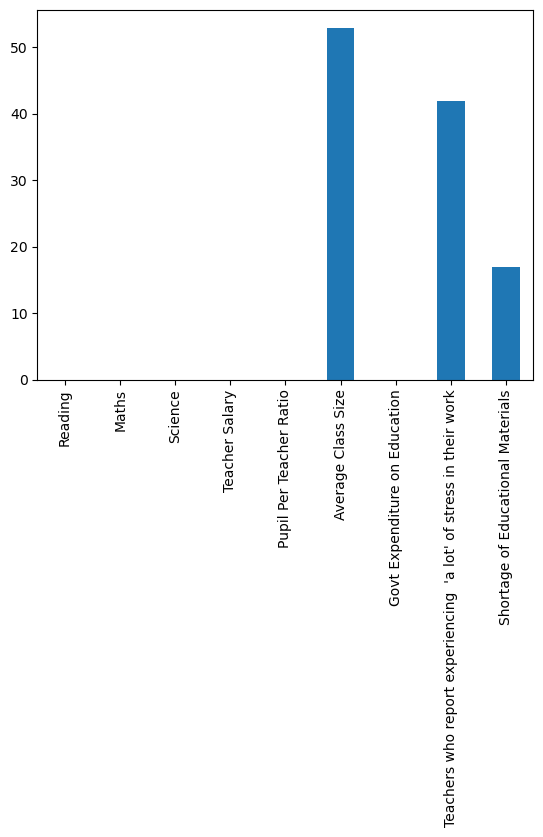

In [15]:
df.isna().sum(axis = 0).plot(kind = 'bar')
plt.show()

<Axes: title={'center': 'lack of materials before imputation'}, ylabel='Frequency'>

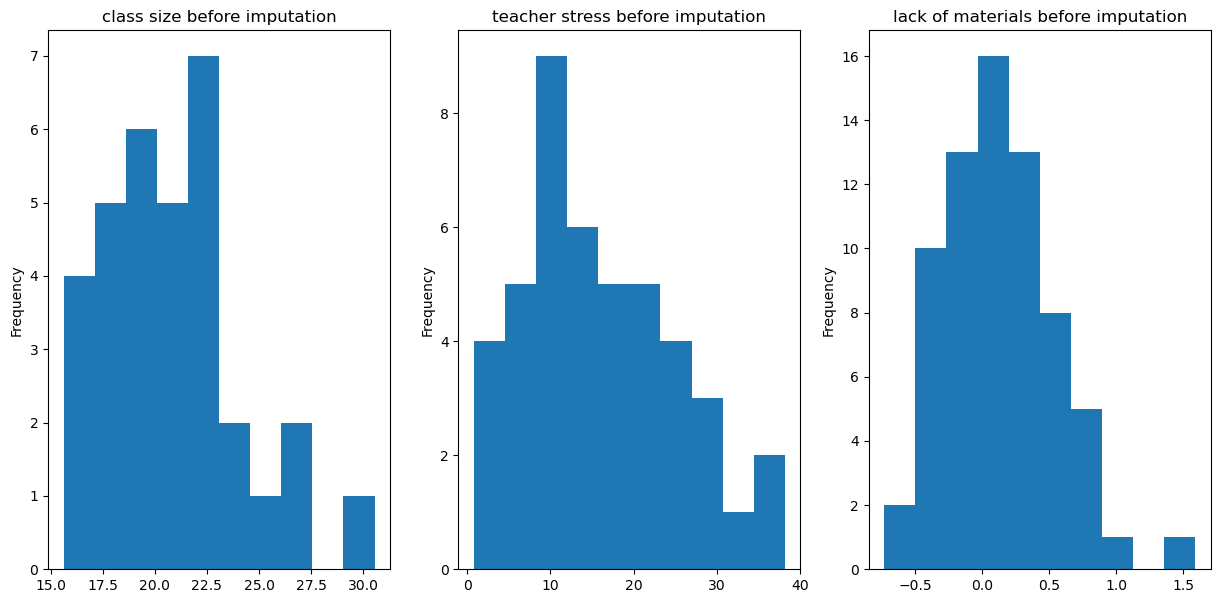

In [16]:
fig, ax = plt.subplots(1,3, figsize = (15, 7))
df['Average Class Size'].plot(kind = 'hist', ax = ax[0],title ='class size before imputation' )
df["Teachers who report experiencing  'a lot' of stress in their work"].plot(kind = 'hist', ax = ax[1], title = 'teacher stress before imputation')
df['Shortage of Educational Materials'].plot(kind = 'hist', ax =ax[2], title = 'lack of materials before imputation')

In [17]:
df2 = fill_na(df)

In [18]:
df2.isna().sum(axis = 0)

Reading                                                              0
Maths                                                                0
Science                                                              0
Teacher Salary                                                       0
Pupil Per Teacher Ratio                                              0
Average Class Size                                                   0
Govt Expenditure on Education                                        0
Teachers who report experiencing  'a lot' of stress in their work    0
Shortage of Educational Materials                                    0
dtype: int64

<Axes: title={'center': 'lack of materials after imputation'}, ylabel='Frequency'>

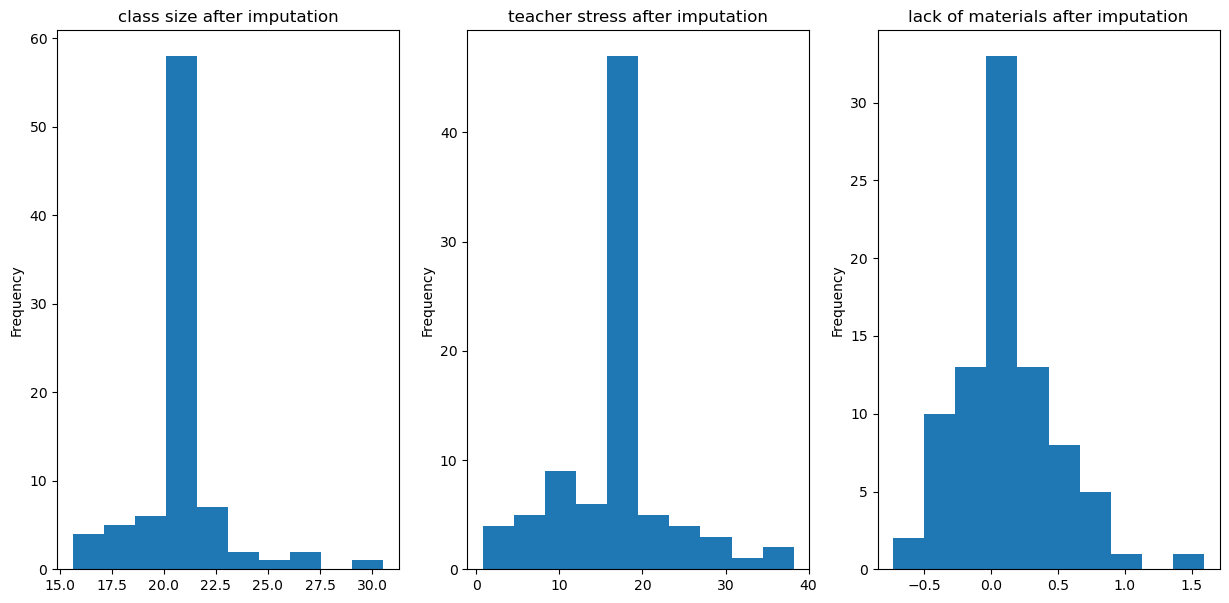

In [19]:
fig, ax = plt.subplots(1,3, figsize = (15, 7))
df2['Average Class Size'].plot(kind = 'hist', ax = ax[0],title ='class size after imputation' )
df2["Teachers who report experiencing  'a lot' of stress in their work"].plot(kind = 'hist', ax = ax[1], title = 'teacher stress after imputation')
df2['Shortage of Educational Materials'].plot(kind = 'hist', ax =ax[2], title = 'lack of materials after imputation')

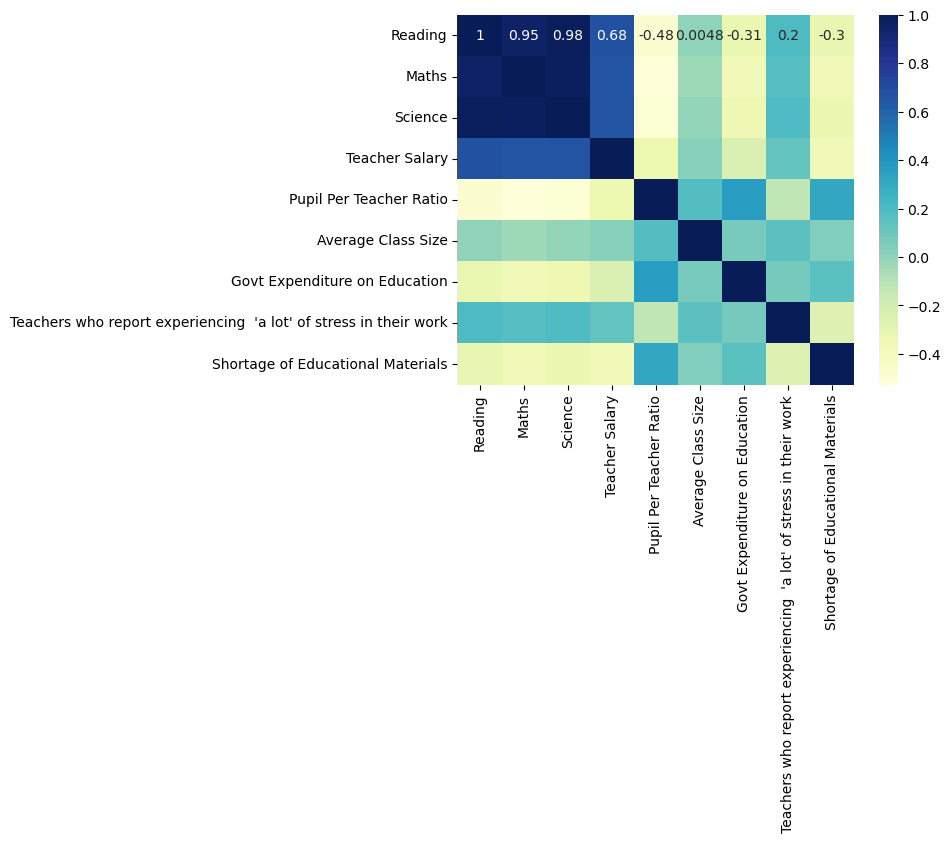

In [20]:
sns.heatmap(df2.corr(), cmap = 'YlGnBu',annot = True)
plt.show()

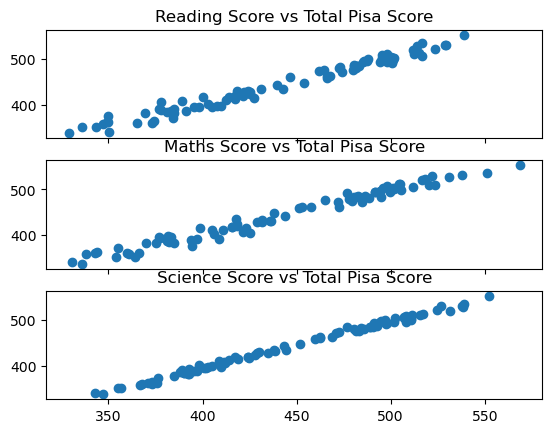

In [21]:
_, ax = plt.subplots(3,1, sharex = True)
for i in range(len(pisa_score.columns)):
    ax[i].scatter(pisa_score.iloc[:,[i]], pisa_score.mean(axis = 1))
    ax[i].set_title(f'{list(pisa_score.iloc[:,[i]].columns)[0]} Score vs Total Pisa Score')


In [22]:
df2 = df2.drop(columns= ['Reading', 'Maths', 'Science', 'Average Class Size', "Teachers who report experiencing  'a lot' of stress in their work"])

df2 = df2.assign(Total_Score = pisa_score.mean(axis = 1))

In [23]:
final_df = df2.assign(Spending_Efficiecy = df2.Total_Score/df2['Govt Expenditure on Education'])

In [24]:
final_df = final_df.sort_values(by = 'Total_Score', ascending = False)
print('Top Five Countries: ')
print(final_df.Total_Score.head())
print('\n')
print('Bottom Five Countries: ')
print(final_df['Total_Score'].tail())

Top Five Countries: 
Country
Singapore    553.266667
China        535.644444
Korea        531.444444
Finland      529.555556
Japan        527.833333
Name: Total_Score, dtype: float64


Bottom Five Countries: 
Country
Kosovo                358.333333
Uzbekistan            351.666667
Philippines           351.333333
Dominican Republic    341.222222
Cambodia              337.333333
Name: Total_Score, dtype: float64


<Axes: title={'center': 'Distributon of Total PISA Scores'}, ylabel='Frequency'>

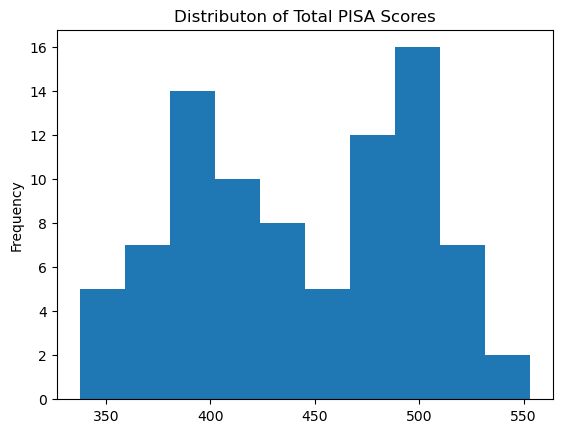

In [25]:
final_df.Total_Score.plot(kind = 'hist', title = 'Distributon of Total PISA Scores')

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


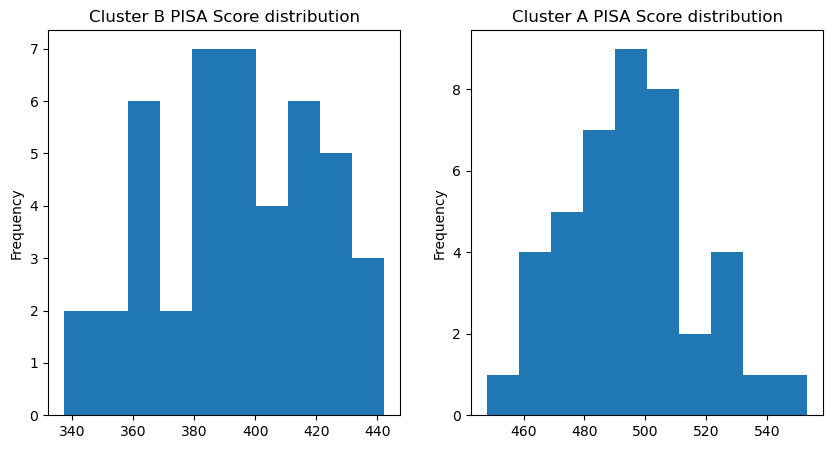

Cluster A nations: ['Singapore', 'China', 'Korea', 'Finland', 'Japan', 'Canada', 'Estonia', 'New Zealand', 'Australia', 'Netherlands', 'Switzerland', 'Ireland', 'Belgium', 'Poland', 'Germany', 'United Kingdom', 'Slovenia', 'Denmark', 'Sweden', 'Czech Republic', 'Viet Nam', 'France', 'Austria', 'Norway', 'United States', 'Latvia', 'Hungary', 'Iceland', 'Spain', 'Portugal', 'Luxembourg', 'Italy', 'Lithuania', 'Croatia', 'Russia', 'Slovak Republic', 'Belarus', 'Ukraine', 'Israel', 'Malta', 'Greece', 'Turkey']

Cluster B nations: ['Serbia', 'Chile', 'United Arab Emirates', 'Brunei Darussalam', 'Cyprus', 'Bulgaria', 'Romania', 'Uruguay', 'Moldova', 'Trinidad and Tobago', 'Thailand', 'Malaysia', 'Costa Rica', 'Mexico', 'Montenegro', 'Kazakhstan', 'Mongolia', 'Bosnia and Herzegovina', 'Colombia', 'Jamaica', 'Jordan', 'Brazil', 'Argentina', 'Georgia', 'Azerbaijan', 'Albania', 'Qatar', 'Saudi Arabia', 'Peru', 'Indonesia', 'Tunisia', 'North Macedonia', 'Lebanon', 'Panama', 'Guatemala', 'Morocco', 'Algeria', 'El Salvador', 'Paraguay', 'Kosovo', 'Uzbekistan', 'Philippines', 'Dominican Republic', 'Cambodia']

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init = 10)
final_df['PISA_Cluster'] = kmeans.fit_predict(final_df[['Total_Score']])

Cluster_A_df = final_df.loc[final_df.PISA_Cluster == 1]
Cluster_B_df = final_df.loc[final_df.PISA_Cluster == 0]

fig, ax = plt.subplots(1,2, figsize = (10, 5))
Cluster_A_df.Total_Score.plot(kind = 'hist', ax = ax[1], title = 'Cluster A PISA Score distribution')
Cluster_B_df.Total_Score.plot(kind = 'hist', ax = ax[0], title = 'Cluster B PISA Score distribution')
plt.show()
print('\n')
print('\n')
display(Markdown(f'Cluster A nations: {list(Cluster_A_df.index)}'))
print('\n')
display(Markdown(f'Cluster B nations: {list(Cluster_B_df.index)}'))

**Data Cleaning**
- Average class size has 46 missing values
- Histogram shape of average class size before and after mean imputation of missing values is similar.
- Howver, it is semantically similar to pupil-teacher ratio, so we drop average class size column.

- Index of Teachers who report experiencing 'a lot' of stress in their work had 42 missing values
- Histogram shape of Teachers who report experiencing 'a lot' of stress in their work before and after mean imputation of missing values is visibly different, hence we drop the column because we can not find external data.

- Index of shortage of education materials has 17 missig values.
- The histogram shape of index of shortage of education materials before and after mean imuation of missing values is similarand static. We retain the column
  
**Feature Engineering**
- Pisa maths, reading and science scores are highly colinear.
- This can lead to redundancy. we use the average of all three variables. 'Total PISA Score'

- To explore the financial efficiency of countries get the ratio of Total PISA Scores to govenment expenditure on education.
- Spending Efficiency = Total PISA Score / Govt Expenditure

**Unsupervised Machine Learning**
- Total PISA Scores dsitribution shows a slightly skewed bimodality (two modes).
- Train a simple K-Means clustering model to group countries into two group according to the two modes.
- nuber of centroids hyper parameter (k) is set two 2 and number of random initializations (init) is set to 10.
- The two observed groups are shown above.

**Export the final dataframe as csv document before conversion to a PDF fdocument for the RAG application** 

In [28]:
final_df.to_csv(r"C:\Users\HP\OneDrive\Desktop\New Datasets\final_dataframe.csv")